# Cats vs Dogs Classification using CNN - Regularization and ImageDataGenerator

## Use Image Augmentation using Keras ImageDataGenerator for Enhanced Accuracy

## What is Overfitting?

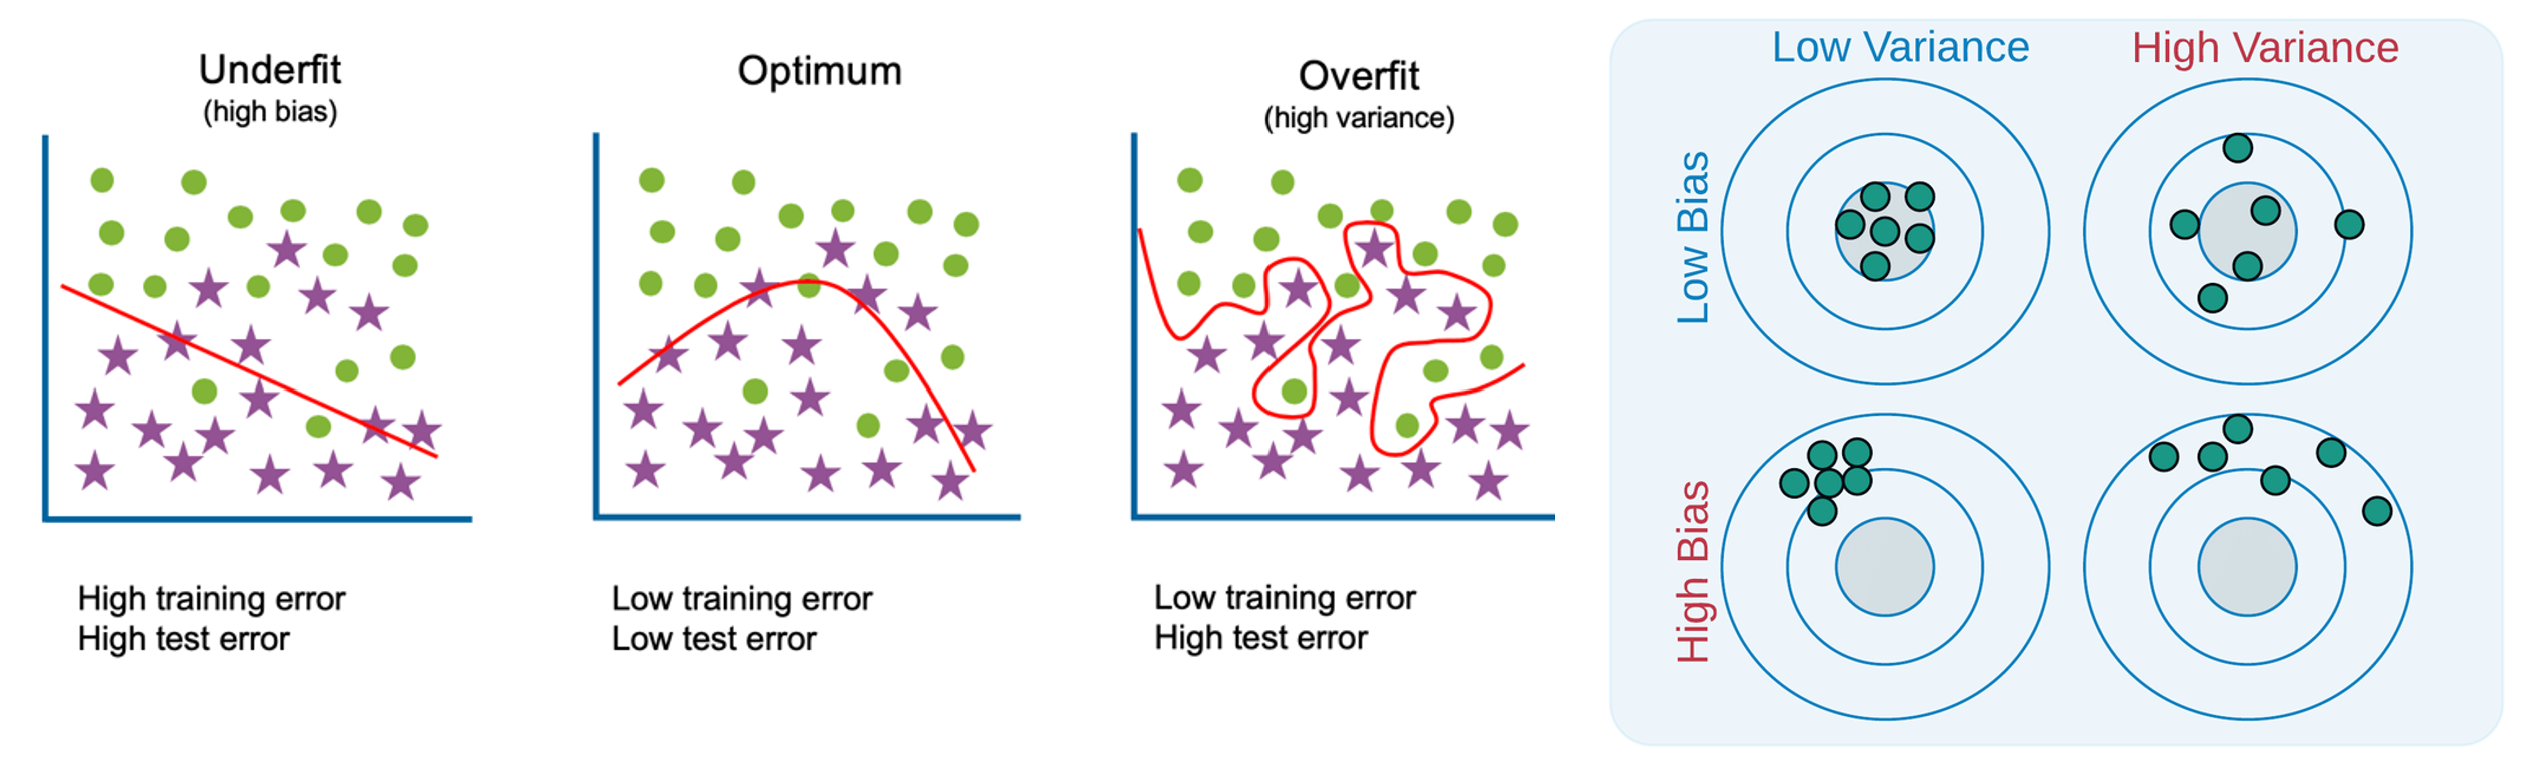
Overfitting is a common problem in deep learning where the model becomes too complex and starts to fit the training data too well, but fails to generalize well to new, unseen data. Here are some characteristics of overfitting in deep learning:

- High training accuracy: the model achieves very high accuracy on the training set.
- Low validation accuracy: the model has low accuracy on the validation set, which indicates that it is not generalizing well to new data.
- Large gap between training and validation accuracy: there is a large difference between the training accuracy and the validation accuracy, which indicates that the model is memorizing the training data rather than learning the underlying patterns.
- Poor performance on test data: when tested on new, unseen data, the model performs poorly, indicating that it is not able to generalize well beyond the training data.

## What is Regularization?
- Regularization is a technique used in deep learning to prevent overfitting of the model. Overfitting occurs when the model fits too well to the training data and fails to generalize well to new, unseen data.
- Regularization adds a penalty term to the loss function of the model, which encourages the model to learn simpler, smoother decision boundaries rather than complex, jagged ones. This helps the model to avoid overfitting and generalize better to new data.

### Types of Regularization
- **L1 and L2 Regularization:** add a penalty term to the loss function that encourages the model to learn smaller weights
- **Dropout:** randomly drops out some of the neurons during training to prevent co-adaptation of neurons and encourage the model to learn more robust features
- **Early Stopping:** stops the training process when the validation loss stops improving to prevent overfitting
- **Data Augmentation:** artificially increases the size of the training set by applying random transformations to the data to improve the generalization ability of the model
- **Batch Normalization:** normalizes the input data to each layer of the network, which helps to prevent overfitting and improve the training speed

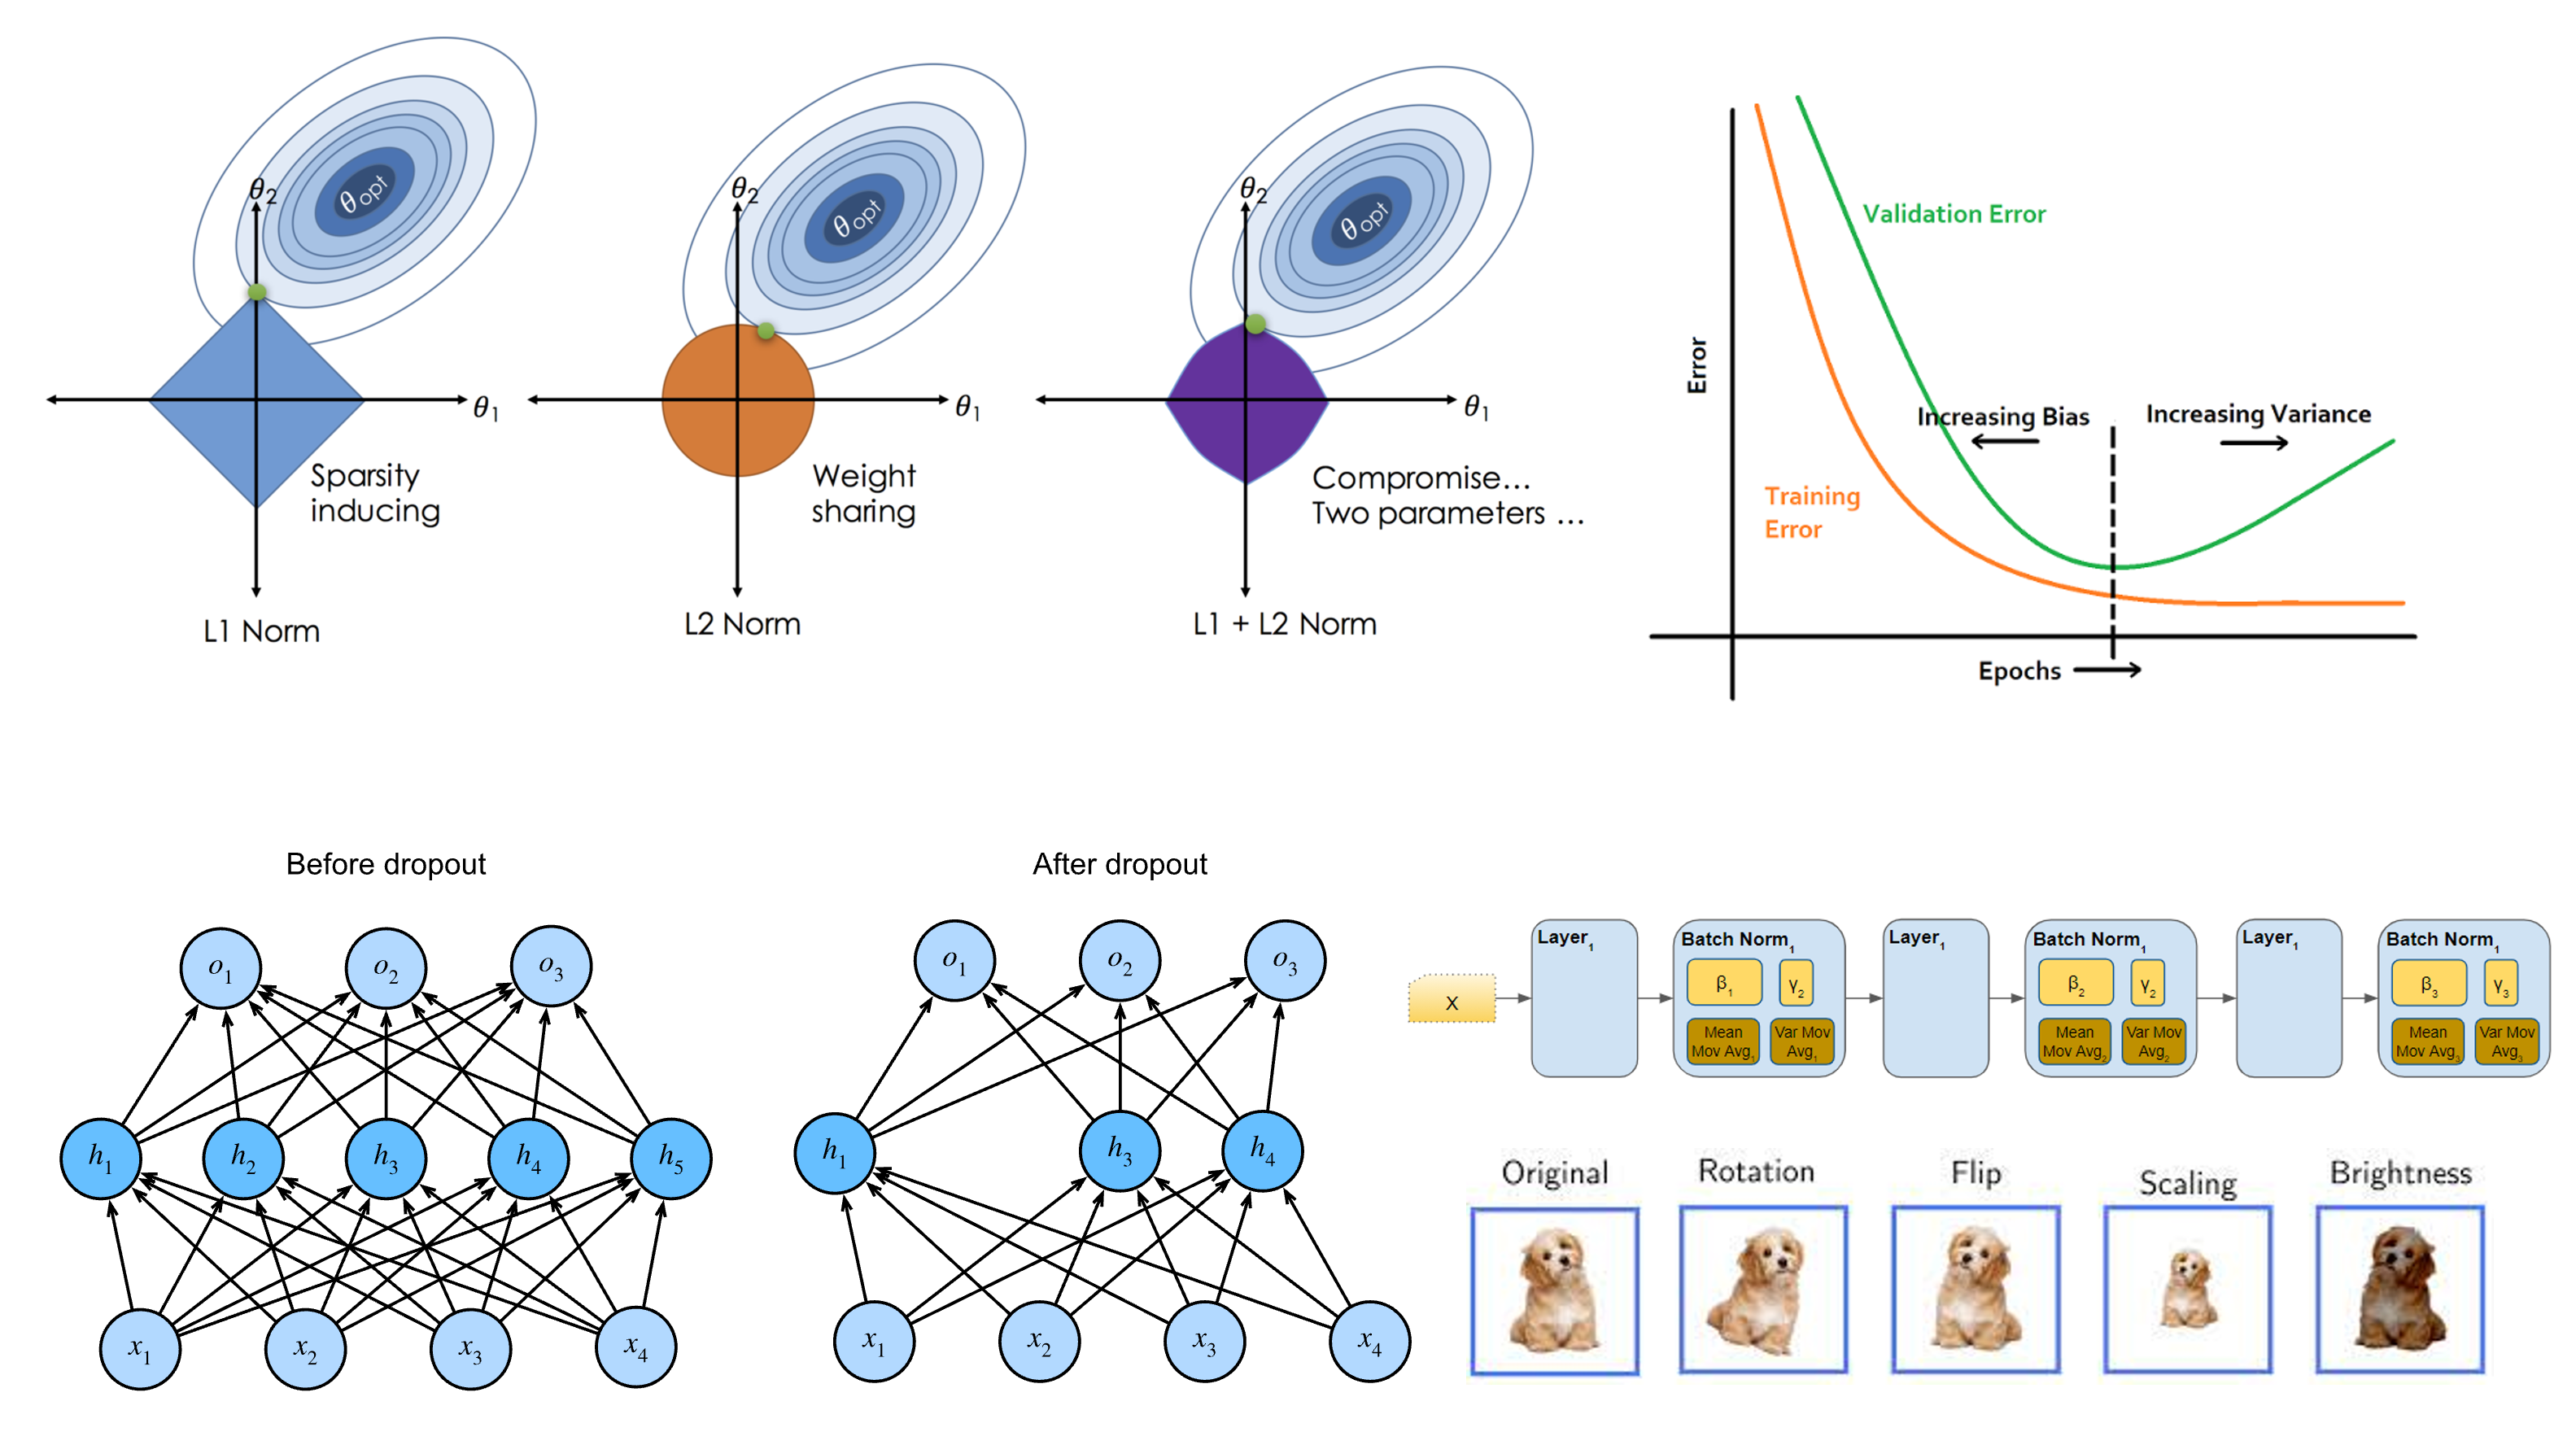

## L1 and L2 Regularization
L1 and L2 regularization are commonly used techniques in deep learning to prevent overfitting of the model by adding a penalty term to the loss function.
### L1 regularization:
- Adds a penalty term to the loss function that is proportional to the absolute value of the weights
- The regularization term is calculated as the sum of the absolute values of the weights multiplied by a regularization parameter λ
- Encourages the model to learn sparse weight vectors, i.e., to set many of the weights to zero
- Can help to simplify the model and reduce overfitting
- Useful when we have a large number of features and we want to reduce the number of non-zero weights in the model

### L2 regularization:
- Adds a penalty term to the loss function that is proportional to the square of the weights
- The regularization term is calculated as the sum of the squared values of the weights multiplied by a regularization parameter λ
- Encourages the model to learn small weight vectors
- Can also help to simplify the model and reduce overfitting
- Useful when we want to prevent the weights from becoming too large, but we don't necessarily want to reduce the number of non-zero weights

During training, the loss function (which includes the regularization term) is optimized using stochastic gradient descent or another optimization algorithm. The gradients of the loss function with respect to the weights are used to update the weights in each iteration of the training process.

## Dropout
Dropout is a regularization technique that randomly drops out some of the neurons during training to prevent co-adaptation of neurons and encourage the model to learn more robust features. Dropout is a very effective regularization technique that is commonly used in deep learning.
- During training, a certain fraction (e.g., 50%) of the neurons in a layer are randomly selected and their outputs are set to zero.
- The remaining neurons are still active and their outputs are scaled by a factor equal to the dropout probability (e.g., 0.5 in the case of 50% dropout).
- Dropout can be applied to any layer in the model, including input and output layers, but is most commonly used in hidden layers.
- Dropout effectively creates an ensemble of multiple sub-networks that share weights but have different configurations of active neurons.
- During inference (i.e., when making predictions on new data), all neurons are active and the output is computed by multiplying the activations of each neuron by the weights and summing over all neurons in the layer.
- Dropout can be used in combination with other regularization techniques, such as L1 and L2 regularization, to further improve the performance of the model.

See details here https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout

## Early Stopping
- Early stopping is a regularization technique that stops the training process when the validation loss stops improving to prevent overfitting.
- During training, the model is evaluated on a separate validation set after each epoch or a fixed number of iterations.
- If the validation loss does not improve for a certain number of epochs, the training process is stopped to prevent overfitting.
- Early stopping can be used in combination with other regularization techniques, such as L1 and L2 regularization, and with other optimization algorithms, such as stochastic gradient descent, to further improve the performance of the model.
- Early stopping is easy to implement and is computationally inexpensive, but it requires a separate validation set and can be sensitive to the choice of hyperparameters.

## Batch Normalization
- Batch normalization is a regularization technique that normalizes the input data to each layer of the network, which helps to prevent overfitting and improve the training speed.
- It involves normalizing the output of a previous layer by subtracting the mean and dividing by the standard deviation of the outputs within a mini-batch of training examples.
- Batch normalization can be applied to any layer of the neural network, including the input and output layers.
- By normalizing the inputs to each layer, batch normalization can prevent the activations of the layers from becoming too large or too small, which can cause the gradients to either vanish or explode during backpropagation.


## Augmentation

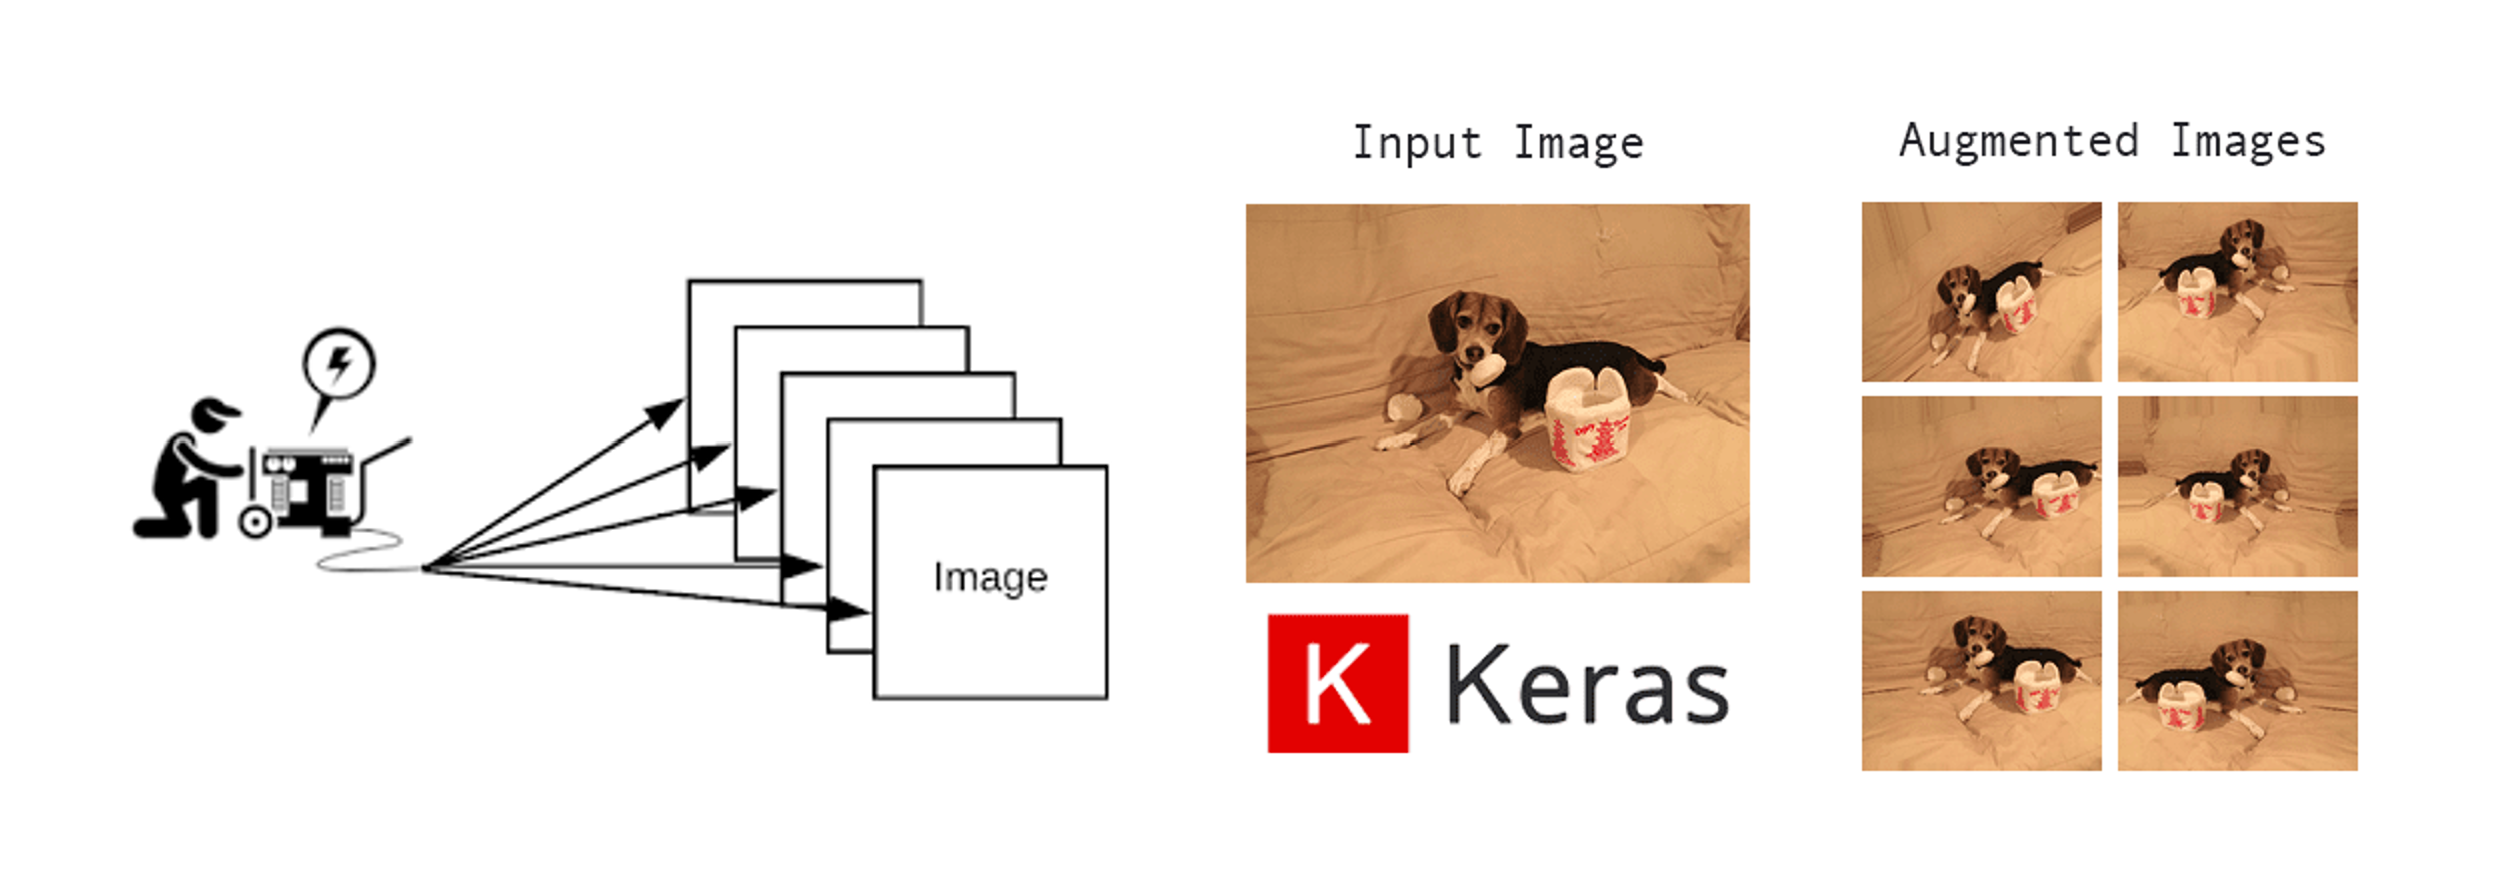

- Image augmentation is a technique that can be used to artificially expand the size of a training dataset by creating modified versions of images in the dataset.
- We can do Data Augmentation using 
    - ImageDataGenerator().flow_from_directory() method
    - ImageDataGenerator().flow_from_dataframe() method
    - ImageDataGenerator().flow() method

- flow(), It takes data in the form of datasets like np. arrays directly where in case of datage. flow_from_directory it takes data from folders containing labelled images

- There are many types of data augmentation techniques, such as cropping, flipping, and much more.
- In this notebook, we will use ImageDataGenerator to perform some common image augmentation techniques, such as:
    - Random rotation
    - Random shift
    - Random shear
    - Random zoom
    - Random channel shift
    - Horizontal and vertical flipping
    - Random brightness

- For more information about ImageDataGenerator, please check the official documentation: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

## Dogs and Cats Dataset
https://www.tensorflow.org/datasets/catalog/cats_vs_dogs

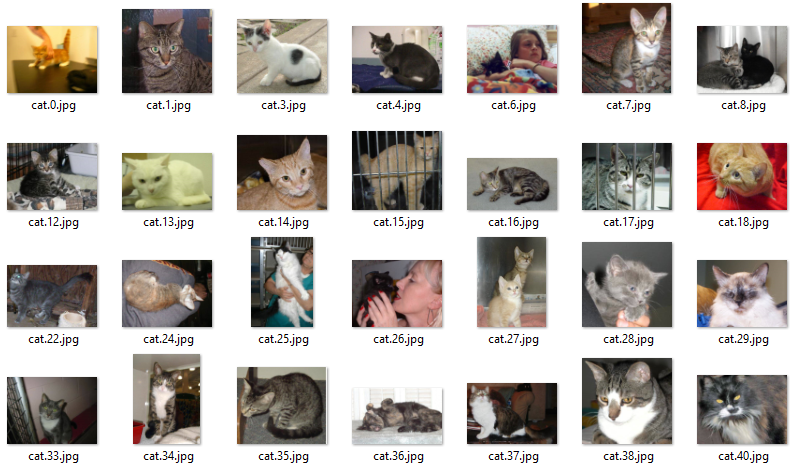

- The Dogs and Cats dataset contains around 23k images of dogs and cats.
- We will be downloading the dataset from the TensorFlow Datasets library.
- The dataset is already split into training and validation sets, so we don't need to split it manually.
- The dataset is also already preprocessed and all images are of the same size (256 x 256 x 3).
- For better understanding of the dataset, I would be downloading the dataset and then visualizing it.

# !pip install tensorflow_datasets

In [ ]:
!pip install tensorflow_datasets

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
# info

In [ ]:
for i, example in enumerate(dataset['train']):
  # example = (image, label)
  image, label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)

  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label], i)
  tf.keras.preprocessing.image.save_img(filename, image.numpy())
  # print(filename)
  # break

## Building Convolutions Neural Network (CNN) Model with Image Augmentation
https://poloclub.github.io/cnn-explainer/

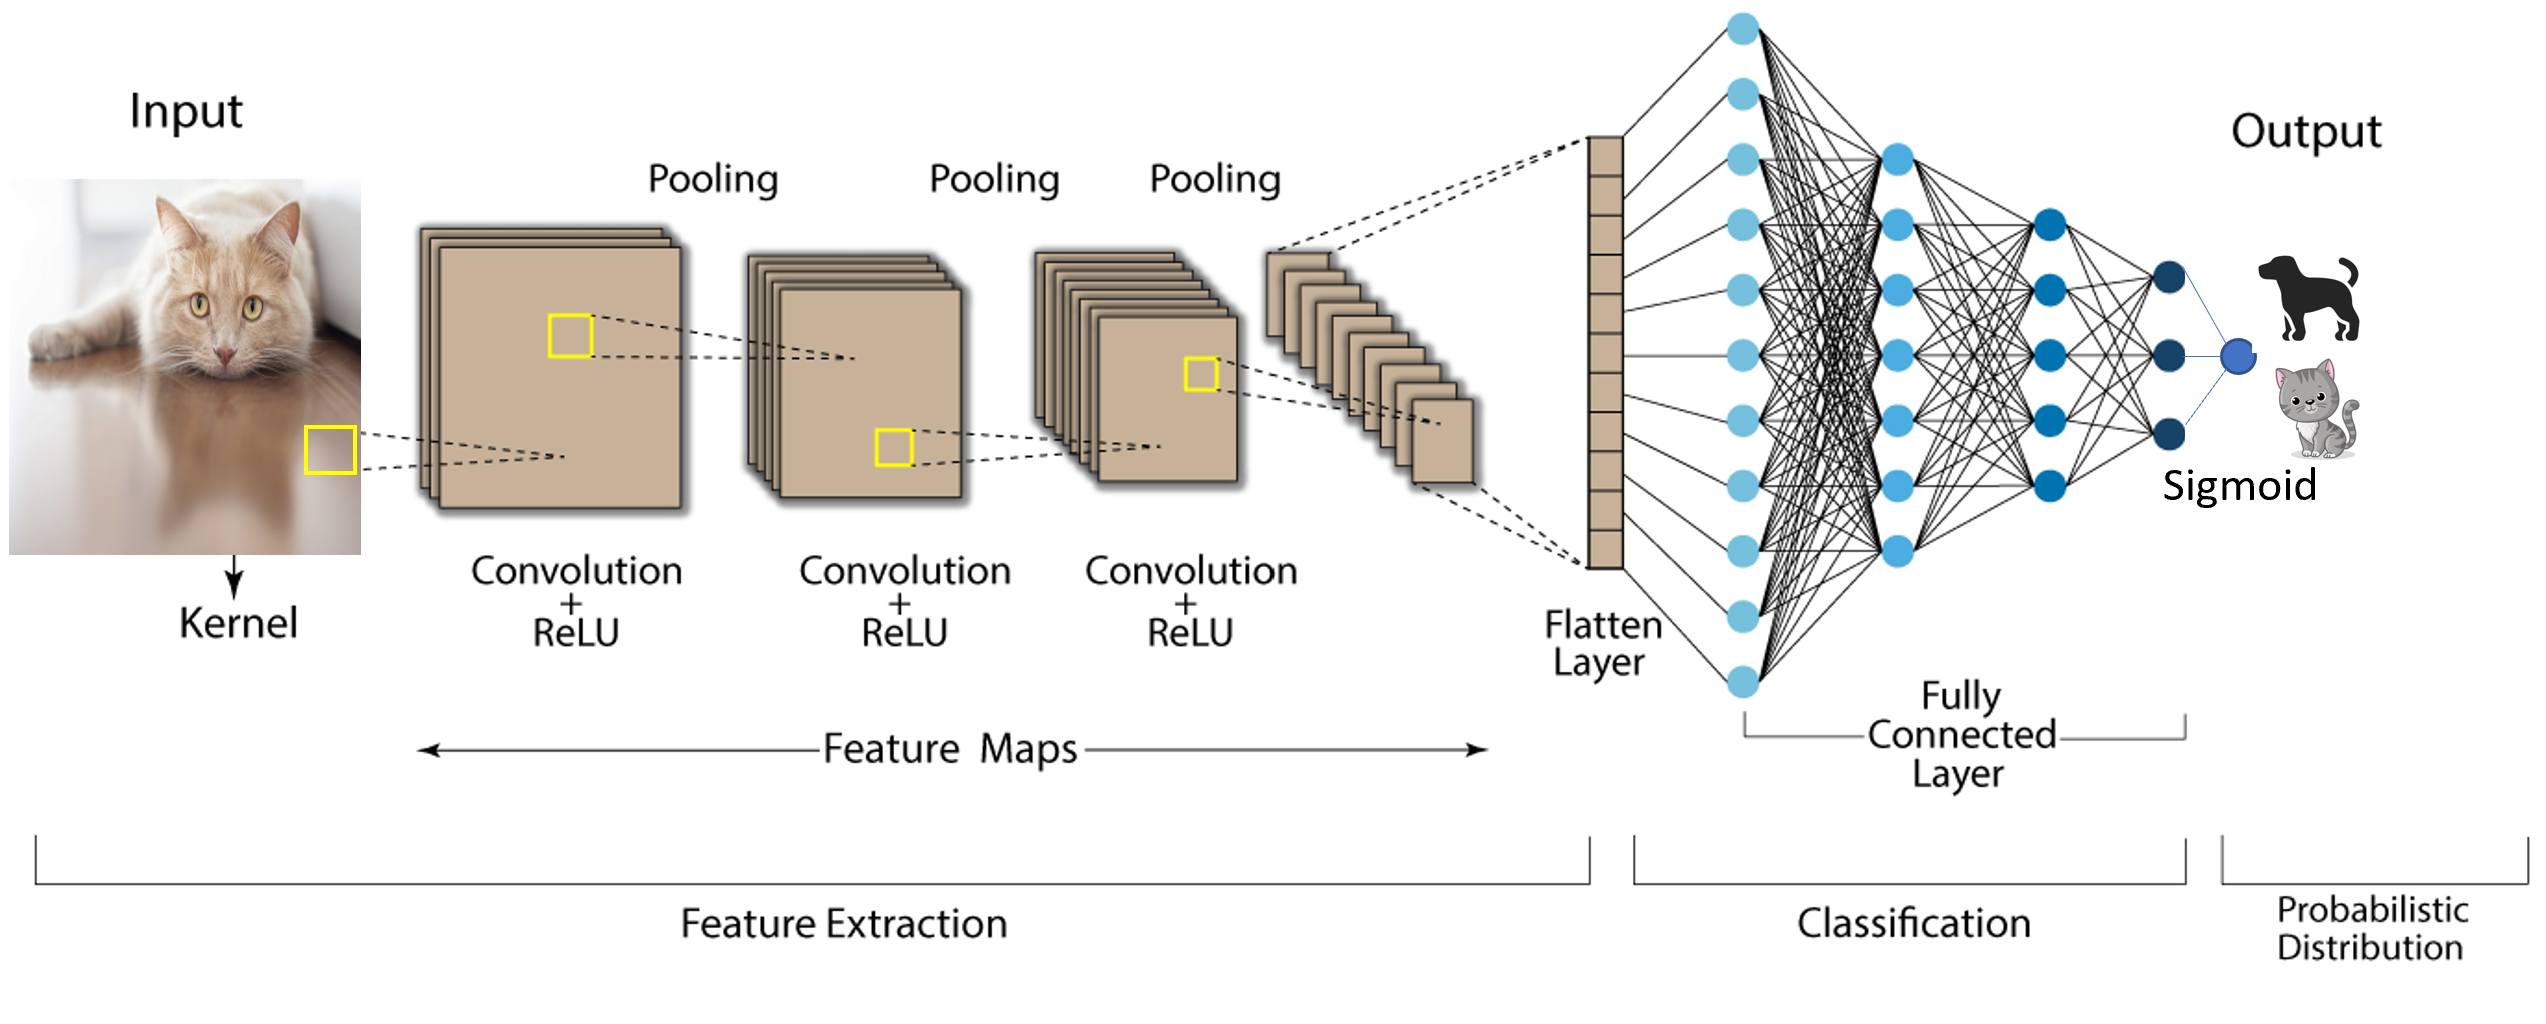

- CNN Building Blocks
    - Input Layer
    - Convolutional Layer
    - Pooling Layer
    - Dropout Layer
    - Batch Normalization Layer
    - Activation Layer
    - Fully Connected Layer
    - Flatten Layer
    - Output Layer
    

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2, rotation_range=10,
                              width_shift_range=0.1, height_shift_range=0.1,
                             shear_range=0.1, zoom_range=0.10, horizontal_flip=True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150), 
                                              batch_size=32, 
                                              class_mode='binary',
                                              subset='training')

validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150, 150), 
                                              batch_size=32, 
                                              class_mode='binary',
                                              subset='validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


In [ ]:
# build CNN Model


In [ ]:
from keras.backend import batch_normalization
model = Sequential()

# 1st layer CNN
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# 2nd layer CNN
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

# 3rd Layer
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(2))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))




In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
582/582 [==============================] - 195s 330ms/step - loss: 0.6949 - accuracy: 0.5598 - val_loss: 0.6744 - val_accuracy: 0.5827
Epoch 2/10
582/582 [==============================] - 172s 295ms/step - loss: 0.6500 - accuracy: 0.6153 - val_loss: 0.6284 - val_accuracy: 0.6637
Epoch 3/10
582/582 [==============================] - 172s 296ms/step - loss: 0.6092 - accuracy: 0.6714 - val_loss: 0.5633 - val_accuracy: 0.7093
Epoch 4/10
582/582 [==============================] - 180s 309ms/step - loss: 0.5591 - accuracy: 0.7151 - val_loss: 0.5355 - val_accuracy: 0.7257
Epoch 5/10
582/582 [==============================] - 174s 299ms/step - loss: 0.5133 - accuracy: 0.7486 - val_loss: 0.4774 - val_accuracy: 0.7773
Epoch 6/10
582/582 [==============================] - 171s 294ms/step - loss: 0.4785 - accuracy: 0.7717 - val_loss: 0.4466 - val_accuracy: 0.7889
Epoch 7/10
582/582 [==============================] - 171s 293ms/step - loss: 0.4540 - accuracy: 0.7857 - val_loss: 0.4574 -

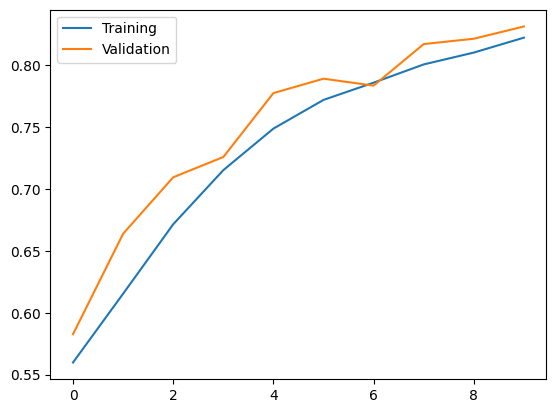

In [ ]:
history.history

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend(['Training', 'Validation'])


In [ ]:
# save model
model.save('cats_vs_dogs.h5')

In [ ]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
img = Image.open(requests.get(img_url, stream=True).raw).resize((150, 150))

image_array = image.img_to_array(img)

img = np.expand_dims(image_array, axis=0)

img = img/255

prediction = model.predict(img)

TH = 0.5
prediction = int(prediction[0][0]>TH)
classes = {v:k for k,v in train_generator.class_indices.items()}
classes[prediction]

1/1 [==============================] - 0s 18ms/step


'cat'

'dog'